Импортирую библиотеки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")

### Эксперимент №1:Тестирование разрешения фотографий товаров

Для решения данной задачи я воспользуюсь однофакторным дисперсионным анализом, так как по условиям на нашу зависимую переменную events влияет один фактор, а именно - разрешение фотографий товаров, при этом сравнивают три группы разрешений:

* A – прямоугольные 16:9
* B – квадратные
* C – прямоугольные 12:4

Подгружаю датасет, смотрю на данные, ищу пустые значения.

In [2]:
df_1 = pd.read_csv('5_task_1.csv')

In [12]:
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
df_1.dtypes

id         int64
group     object
events     int64
dtype: object

In [3]:
df_1.isna().sum()

id        0
group     0
events    0
dtype: int64

### 1. C помощью теста Левена проверяю являются ли дисперсии внутри групп одинаковыми (гомогенными). То есть это будет нулевой гипотезой Н0 для теста.

In [21]:
# выделяю в отдельные переменные значения events для трех групп: A, B, C

a_pc = df_1.query('group == "A"').events
b_pc = df_1.query('group == "B"').events
c_pc = df_1.query('group == "C"').events

In [45]:
# применяю тест Левена для сравнения дисперсий 

levene(a_pc, b_pc, c_pc)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

#### ВЫВОД: Так как p_value > 0,05 мы не можем отклонить нулевую гипотезу о том, что дисперсии гомогенные

### 2. С помощью теста Шапиро - Уилка пытаюсь выяснить распределены ли данные нормально. Нулевая гипотеза (Н0) - данные распределены нормально. При этом использую метод sample (), так как тест плохо работает на больших выборках и может показать даже самые незначительные отклонения 

In [46]:
# провожу тест для группы А

shapiro(df_1.query('group == "A"').events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

#### Так как pvalue > 0.05, мы не можем отклонить нулевую гипотезу. Следовательно данные распределены нормально

In [47]:
# провожу тест для группы В

shapiro(df_1.query('group == "B"').events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

#### Так как pvalue > 0.05, мы не можем отклонить нулевую гипотезу. Следовательно данные распределены нормально

In [48]:
# провожу тест для группы С

shapiro(df_1.query('group == "C"').events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

#### Так как pvalue > 0.05, мы не можем отклонить нулевую гипотезу. Следовательно данные распределены нормально

### 3.Провожу однофакторный дисперсионный анализ с помощью функции f_oneway для сравнения средних в группах 

In [50]:
stats.f_oneway(a_pc, b_pc, c_pc)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

#### ВЫВОД: так как pvalue < 0.05, следовательно значимые различия между группами есть

### 4. Используя критерий Тьюки (pairwise_tukeyhsd) выясняю между какими именно группами существуют стат.значимые различия

In [56]:
print(pairwise_tukeyhsd(df_1['events'], groups=df_1['group']).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Визуализирую полученные значения на графике 

Text(0, 0.5, 'Число покупок')

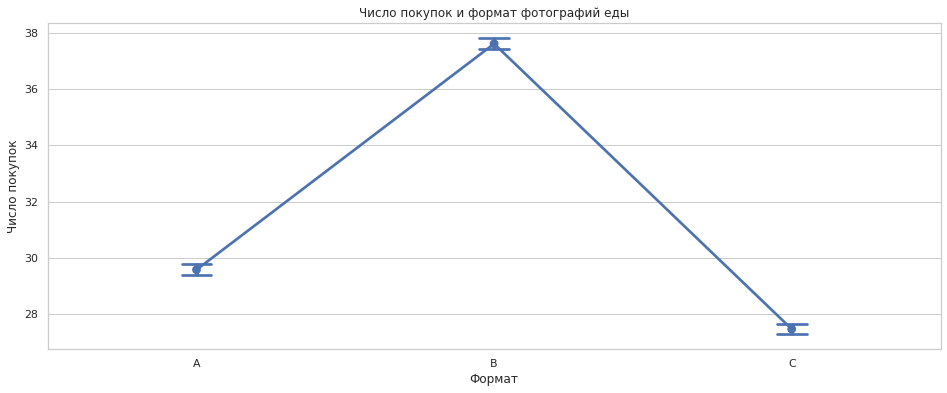

In [112]:
sns.pointplot(x='group', y='events', data = df_1, capsize = .1)
plt.title("Число покупок и формат фотографий еды")
plt.xlabel("Формат")
plt.ylabel("Число покупок")


 Колонка meandiff показывает различие между group2 и group1. Колонка reject показывает, существуют ли стат.значимые различие (True) или нет (False). Видим, что различия существуют между всеми группами

### По результатам теста можно сделать вывод о том, что использование квадратных фотографий (B) товаров увеличило число покупок. Следовательно выбор необходимо сделать в пользу данного формата фотографий. 

### Эксперимент №2:Тестирование кнопки заказа товаров

Для проведения эксперимента я воспользуюсь методом многофакторного дисперсионного анализа, так как в данном случае наша зависимая переменная (сумарное количество товаров) зависит от двух факторов - кнопки заказа приложения и сегмента пользователя

Подгружаю датасет, смотрю на данные, ищу пустые значения.

In [60]:
df_2 = pd.read_csv('5_task_2.csv')

In [61]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [119]:
df_2.dtypes

id               int64
group           object
segment         object
events         float64
combination     object
dtype: object

In [120]:
df_2.isna().sum()

id             0
group          0
segment        0
events         0
combination    0
dtype: int64

### 1. Визуализирую распределение events для контрольной и тестовой групп 

<AxesSubplot:xlabel='events'>

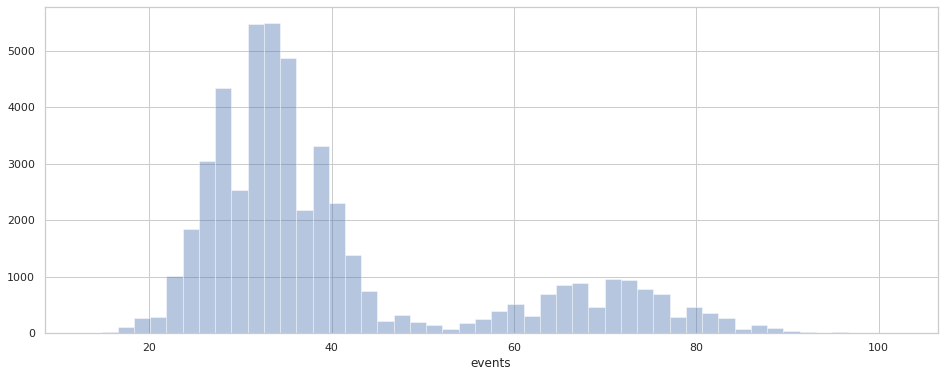

In [87]:
# тестовая группа

sns.distplot(df_2.query('group == "test"').events, kde=False)

<AxesSubplot:xlabel='events'>

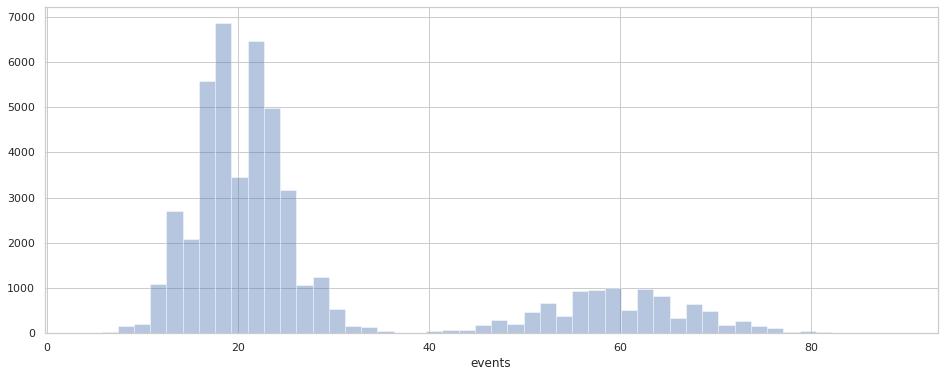

In [88]:
# контрольная группа

sns.distplot(df_2.query('group == "control"').events, kde=False)

### 2. Нахожу средннее, медиану и стандартное отклонение events в разбивке по группе и сегменту пользователя

In [97]:
df_2.groupby(['group','segment']).events.describe().round(2)

count   mean   std   min   25%   50%   75%    max
group   segment                                                     
control high     10000.0  59.97  7.81  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.03  4.47   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.94  8.40  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.03  5.72  13.0  29.0  33.0  37.0   59.0

### Провожу тест

Для проверки эффекта нескольких переменных group и segment на events, с взаимодействием факторов для модели будет применяться следующая формула:
* events ~ segment + group + segment:group

In [102]:
# строим модель 

model = smf.ols(formula='events ~ segment + group + segment:group', data = df_2).fit()

# результаты используем в другой функции anova_lm

aov_table = anova_lm(model, typ=2)

In [103]:
print(round(aov_table,2))

                    sum_sq       df          F  PR(>F)
segment        23624796.65      1.0  689756.38     0.0
group           3837195.41      1.0  112031.86     0.0
segment:group     36642.44      1.0    1069.82     0.0
Residual        3424955.89  99996.0        NaN     NaN


#### Данный тест показывает только то, что и фактор segment, и фактор group и их взаимодействие являются значимыми. Но мы не можем сказать какие именно группы различаются и каким образом. Чтобы ответить на эти вопросы, и понять между какими группами существуют стат.значимые различия, необходимо использовать критерий Тьюки

Для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey

In [107]:
df_2['combination'] = df_2.group + ' \ ' + df_2.segment

In [109]:
df_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [111]:
# использую критерий Тьюки 

print(pairwise_tukeyhsd(df_2['events'], groups = df_2['combination']))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


### ВЫВОДЫ:
* Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
* Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой
* Разница между control/high и test/high составила около 10


Визуализирую результаты теста


Text(0, 0.5, 'Число покупок')

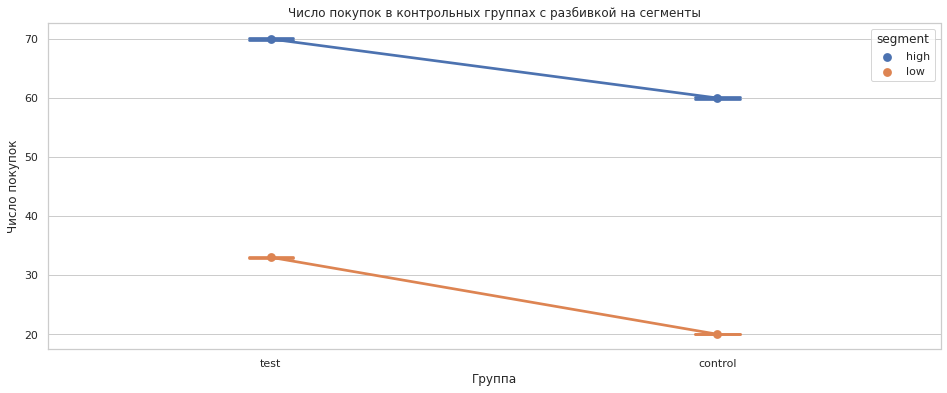

In [116]:
sns.pointplot(x='group', y='events', hue='segment', data = df_2, capsize = .1)

# заголовок графика
plt.title('Число покупок в контрольных группах с разбивкой на сегменты')

# подпись оси х
plt.xlabel('Группа')
# подпись оси y
plt.ylabel('Число покупок')

#### ВЫВОД теста №2: Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо. Судя по графику, для всех групп среднее значение events увеличилось, поэтому принимаем решение выкатить новую версию кнопки заказа